In [0]:
# Loading the data...

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
from scipy import stats

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

ab = drive.CreateFile({'id':'12oyYJByvlefZKL6CGJ6B3D0FkF8jF6wa'}) 
ab.GetContentFile('ab_edited.csv')  
ab = pd.read_csv('ab_edited.csv')

Check for adequate sample sizes.


In [2]:
ab_control = ab[(ab.group == 'control')]
ab_treatment = ab[(ab.group == 'treatment')]
print('The size of the control group is: {}'.format(len(ab_control)))
print('The size of the treatment group is: {}'.format(len(ab_treatment)))

The size of the control group is: 145274
The size of the treatment group is: 145311


Check for changes over time in results.

In [12]:
timestamps = []
for dates in range(len(ab.timestamp)):
  timestamps.append(datetime.datetime.strptime(ab.timestamp[dates], '%Y-%m-%d %H:%M:%S.%f'))

dates = []
for i in range(len(timestamps)):
  dates.append(timestamps[i].date())


ab['date'] = dates
ab.head()

,user_id,timestamp,group,landing_page,converted,date
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21


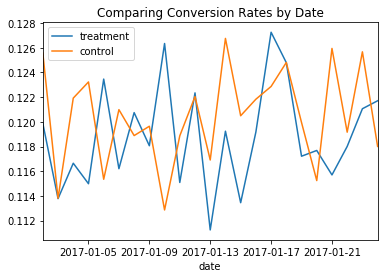

T-Test Results by Date
Ttest_indResult(statistic=-1.8123288054674913, pvalue=0.0699579338988825)
Ttest_indResult(statistic=0.05182821974845549, pvalue=0.9586663564605943)
Ttest_indResult(statistic=-0.6795024407954999, pvalue=0.49683133482307695)
Ttest_indResult(statistic=0.33111903181744556, pvalue=0.7405597598504309)
Ttest_indResult(statistic=2.3999515991310387, pvalue=0.01641085244784032)
Ttest_indResult(statistic=-0.4836129647924235, pvalue=0.628668638020595)
Ttest_indResult(statistic=0.7611804663738991, pvalue=0.446562930057432)
Ttest_indResult(statistic=-0.9315635899845935, pvalue=0.3515792521983202)
Ttest_indResult(statistic=-1.261388402374626, pvalue=0.20719113309271808)
Ttest_indResult(statistic=-0.0026642818202597274, pvalue=0.9978742538059032)
Ttest_indResult(statistic=-0.28071255594768935, pvalue=0.7789352633524722)
Ttest_indResult(statistic=-0.2056136446252576, pvalue=0.837095874040602)
Ttest_indResult(statistic=0.4909032980527966, pvalue=0.6235093367111435)
Ttest_indResult

In [15]:
fig = ab[ab.group=='treatment'][
    ['date', 'converted']].groupby('date').mean().plot()
ab[ab.group=='control'][
    ['date', 'converted']].groupby('date').mean().plot(ax=fig)
plt.legend(['treatment','control'])
plt.title('Comparing Conversion Rates by Date')
plt.show()

print('T-Test Results by Date')

for date in ab.date.unique():
    dated_data = ab[ab.date == date]
    print(stats.ttest_ind(dated_data[dated_data.group == 'treatment'].converted,
                          dated_data[dated_data.group == 'control'].converted))

Formally test for any significant difference in conversions between the treatment and control groups.

In [16]:
print('treatment conversion rate:', ab[ab.group == 'treatment'].converted.mean())
print('control conversion rate:', ab[ab.group == 'control'].converted.mean())

# Are the test and control groups significantly different?
stats.ttest_ind(ab[ab.group == 'treatment'].converted,
                ab[ab.group == 'control'].converted)

treatment conversion rate: 0.11880724790277405
control conversion rate: 0.1203863045004612


Ttest_indResult(statistic=-1.3116069027036805, pvalue=0.18965383906859376)

The difference in conversion rates is not significant and the p-value is quite high.